# Import Data and Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer

# Load dataset
col_name = ['id', 'brand', 'sentiment', 'tweet']
df = pd.read_csv('twitter_training.csv', names=col_name)


FileNotFoundError: [Errno 2] No such file or directory: 'twitter_training.csv'

# Cleaning Data

In [ ]:
# Remove 'id' column as it is not needed
df = df.drop(columns=["id"])

# Clean the data: Remove missing values and duplicates
df.dropna(inplace=True)  # Remove missing values
df.drop_duplicates(inplace=True)  # Remove duplicates

# Check the cleaned data
df

,brand,sentiment,tweet
0,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,Borderlands,Positive,I am coming to the borders and I will kill you...
2,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,Borderlands,Positive,im coming on borderlands and i will murder you...
4,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
...,...,...,...
74677,Nvidia,Positive,Just realized that the Windows partition of my...
74678,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,Nvidia,Positive,Just realized between the windows partition of...


# Data Visualization

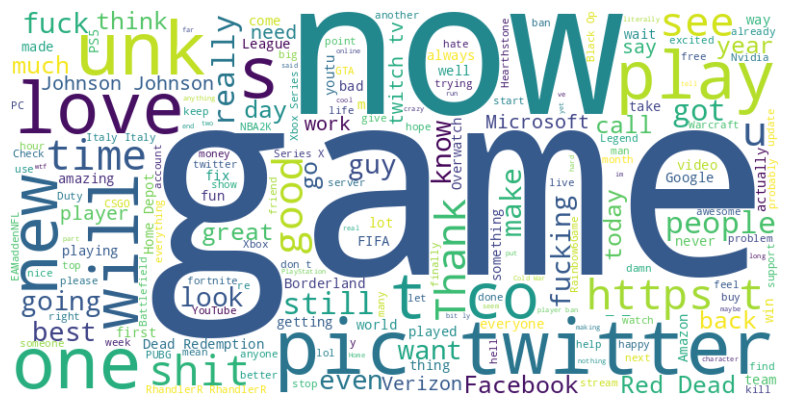

In [ ]:
# Wordcloud for most frequent words in tweets
def plot_wordcloud(data):
    text = " ".join(tweet for tweet in data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

plot_wordcloud(df['tweet'])

In [ ]:
# Sentiment distribution
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', figsize=(8, 5), color=['green', 'red', 'blue'])
plt.title("Sentiment Distribution")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

NameError: name 'df' is not defined

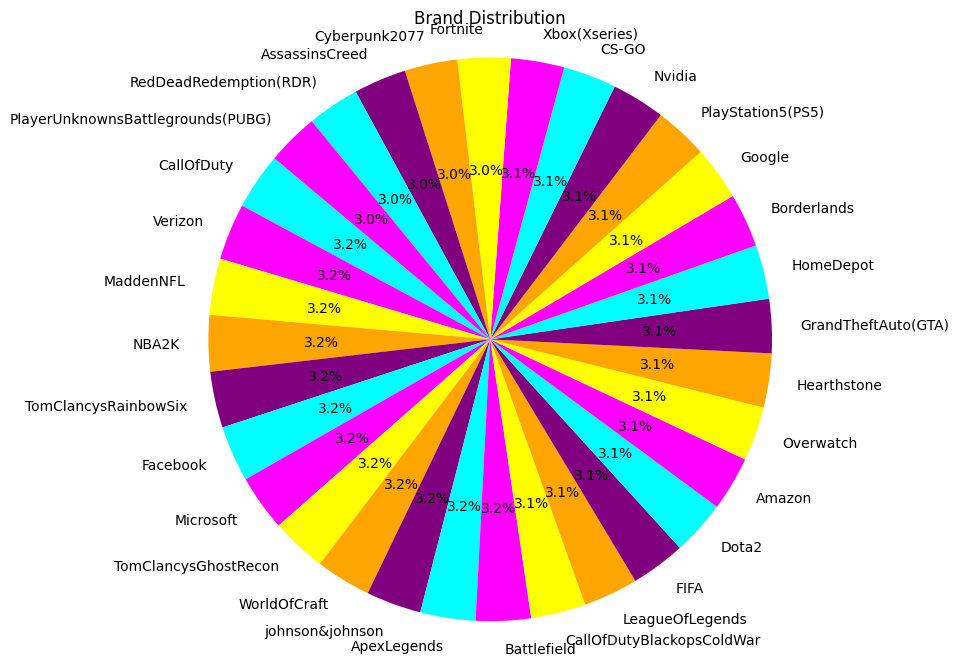

In [ ]:
# Brand distribution
brand_counts = df['brand'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', startangle=140, colors=['cyan', 'magenta', 'yellow', 'orange', 'purple'])
plt.title("Brand Distribution")
plt.axis('equal')
plt.show()

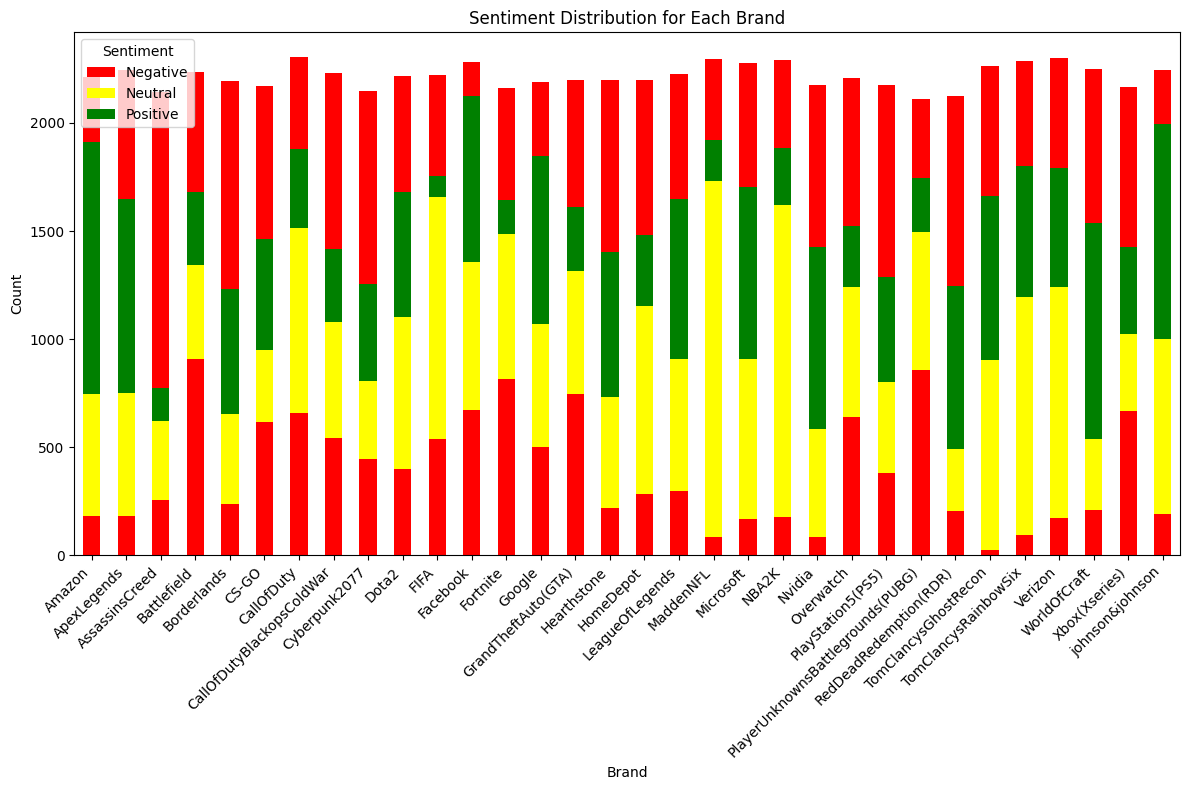

In [ ]:
# Visualize sentiment distribution for each brand
sentiment_by_brand = df.groupby(['brand', 'sentiment']).size().unstack().fillna(0)

# Plot stacked bar chart
sentiment_by_brand.plot(kind='bar', stacked=True, figsize=(12, 8), color=['red', 'yellow', 'green'])

# Title and labels
plt.title('Sentiment Distribution for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Count')

# Adjust x-axis label rotation and spacing
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.subplots_adjust(bottom=0.2)

# Add legend
plt.legend(title='Sentiment', labels=['Negative', 'Neutral', 'Positive'])

# Final layout adjustments and display
plt.tight_layout()
plt.show()


# Preprocessing and Build Model

In [ ]:
# Define the feature and target variable
X = df['tweet']
y = df['sentiment']

# Text vectorization (using TF-IDF)
tfidf = TfidfVectorizer(stop_words='english')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit TF-IDF on training data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Train a model (Naive Bayes classifier)
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# 6. Model evaluation
y_pred = model.predict(X_test_tfidf)

Accuracy: 0.732619316046599


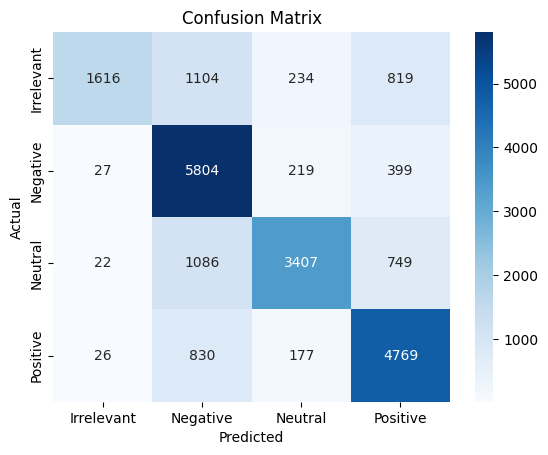

In [ ]:
# Accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Evaluation

In [ ]:
# Precision, Recall, F1 Score
print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")

# ROC Curve for Multi-Class
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_proba = model.predict_proba(X_test_tfidf)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

n_classes = len(lb.classes_)
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {lb.classes_[i]} (AUC = {roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i]):.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


NameError: name 'precision_score' is not defined